# Intro to ML Take Home Final Exam

## Question1: 

**Part A.** Visitors to your website are asked to answer a single survey question before they get access to the content on the page. Among all of the users, there are two categories: Random Clicker (RC), and Truthful Clicker (TC). There are two possible answers to the survey: yes and no. Random clickers would click either one with equal probability. You are also giving the information that the expected fraction of random clickers is 0.3. After a trial period, you get the following survey results: 65% said Yes and 35% said No. What fraction of people who are truthful clickers answered yes? Hint: use the rule of total probability.

In [1]:
# Given probabilities
P_Y_given_RC = 0.5  # Probability of answering Yes given Random Clicker
P_RC = 0.3  # Probability of being a Random Clicker
P_Y = 0.65  # Probability of answering Yes overall

# Using the rule of total probability to find P_Y_given_TC
P_TC = 1 - P_RC  # Probability of being a Truthful Clicker
P_Y_given_TC = (P_Y - P_Y_given_RC * P_RC) / P_TC

print(f"The fraction of people who are truthful clickers and answered 'Yes' is approximately: {P_Y_given_TC:.3f}")

The fraction of people who are truthful clickers and answered 'Yes' is approximately: 0.714


**Part B.** Imagine a medical test for a disease with the following two attributes:

The sensitivity is about 0.993. That is, if someone has the disease, there is a probability of 0.993 that they will test positive.
The specificity is about 0.9999. This means that if someone doesn't have the disease, there is probability of 0.9999 that they will test negative.
In the general population, incidence of the disease is reasonably rare: about 0.0025% of all people have it (or 0.000025 as a decimal probability).
Suppose someone tests positive. What is the probability that they have the disease?

In [2]:
# Given probabilities
P_T_given_D = 0.993  # Sensitivity
P_T_given_not_D = 1 - 0.9999  # Specificity
P_D = 0.000025  # Incidence of the disease

# Calculate P(T) using the law of total probability
P_T = P_T_given_D * P_D + P_T_given_not_D * (1 - P_D)

# Calculate P(D | T) using Bayes' theorem
P_D_given_T = (P_T_given_D * P_D) / P_T

print(f"The probability that a person has the disease given that they tested positive is approximately: {P_D_given_T:.6f}")

The probability that a person has the disease given that they tested positive is approximately: 0.198882


## Question 2:
**Part A:** Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data from the CSV file
df = pd.read_csv('billboard.csv')

df.head()

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


In [5]:
# Group the data by performer and song, then calculate the total number of weeks each song appeared

top10 = df.groupby(['performer','song']).count()[['week']].sort_values(by = 'week' ,ascending = False).reset_index()
top10.rename(columns={'week': 'count'}, inplace=True)
print('Top 10 most popular songs since 1958')
top10[:10]

Top 10 most popular songs since 1958


,performer,song,count
0,Imagine Dragons,Radioactive,87
1,AWOLNATION,Sail,79
2,The Weeknd,Blinding Lights,76
3,Jason Mraz,I'm Yours,76
4,LeAnn Rimes,How Do I Live,69
5,OneRepublic,Counting Stars,68
6,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
7,Jewel,Foolish Games/You Were Meant For Me,65
8,Adele,Rolling In The Deep,65
9,Carrie Underwood,Before He Cheats,64


**Part B:** Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

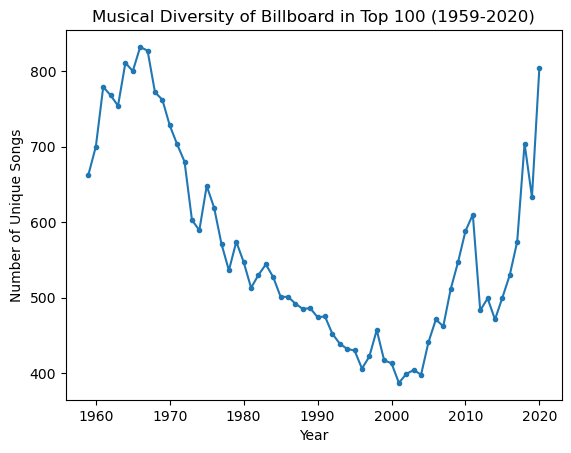

In [6]:
mus_div = df.groupby('year')['song_id'].nunique()

# musical_diversity.rename(columns={'song_id': 'count'},inplace = True)
mus_div = mus_div[~mus_div.index.isin([1958,2021])]

plt.plot(mus_div, marker='.', linestyle='-') #, x= musical_diversity.index, height = musical_diversity.values)
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.title('Musical Diversity of Billboard in Top 100 (1959-2020)')
plt.show()

**Part C:** Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

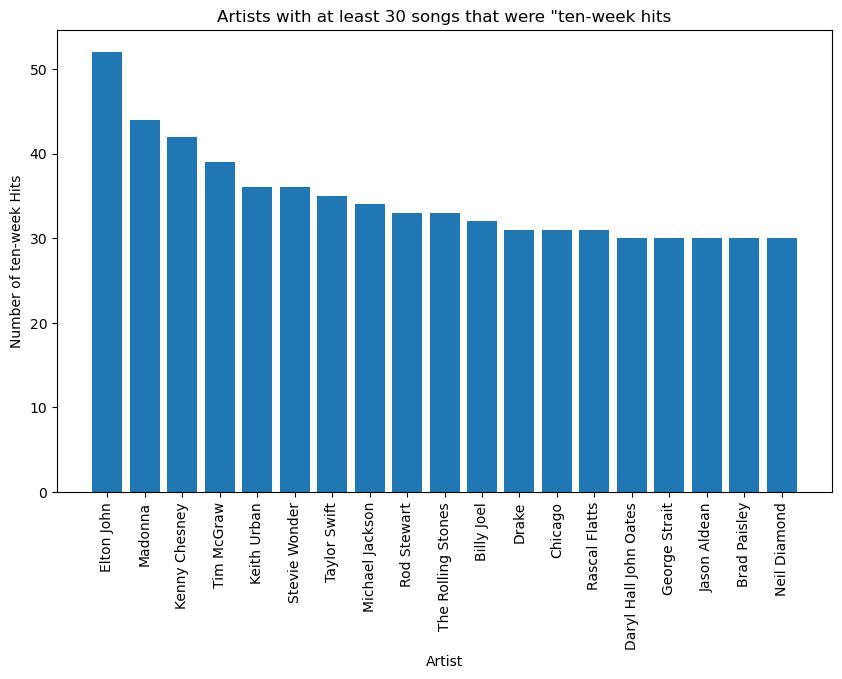

In [7]:
ten_week_hit = top10[top10['count']>=10]

ten_week_hit = ten_week_hit.groupby('performer')['song'].nunique()
artists_ten_week_hit = ten_week_hit[ten_week_hit.values >=30].sort_values(ascending = False)

plt.figure(figsize=(10, 6))
plt.bar(artists_ten_week_hit.index,artists_ten_week_hit) #, x= musical_diversity.index, height = musical_diversity.values)
plt.xlabel('Artist')
plt.ylabel('Number of ten-week Hits')
plt.title('Artists with at least 30 songs that were "ten-week hits')
plt.xticks(artists_ten_week_hit.index, rotation = 'vertical')
plt.show()